# import libiries

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


# EDA

In [4]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
df['label'].value_counts()

label
0    4827
1     747
Name: count, dtype: int64

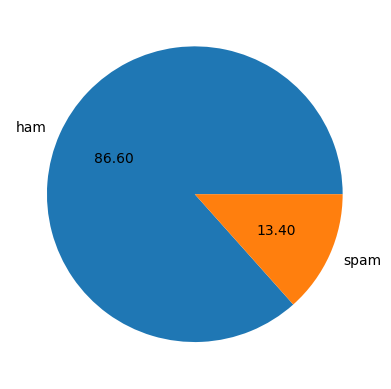

In [6]:
import matplotlib.pyplot as plt 
plt.pie(df['label'].value_counts(), labels=['ham' ,'spam'],autopct="%0.2f" )
plt.show()

In [7]:
import nltk 

In [9]:
df['Num_char']=df['sms'].apply(len)

In [10]:
df.head()

,sms,label,Num_char
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62


In [11]:
df['Num_word']=df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

In [12]:
df['Num_sent']=df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [13]:
df.head()

,sms,label,Num_char,Num_word,Num_sent
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2
1,Ok lar... Joking wif u oni...\n,0,30,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2
3,U dun say so early hor... U c already then say...,0,50,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1


In [14]:
df[['Num_char','Num_word','Num_sent']].describe()

,Num_char,Num_word,Num_sent
count,5574.000000,5574.000000,5574.000000
mean,81.478292,18.854324,2.005920
std,59.848302,13.838509,1.539876
min,3.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,63.000000,15.000000,2.000000
75%,123.000000,27.000000,3.000000
max,911.000000,220.000000,38.000000


In [15]:
df[df['label']==1][['Num_char','Num_word','Num_sent']].describe()

,Num_char,Num_word,Num_sent
count,747.000000,747.000000,747.000000
mean,139.676037,27.998661,3.040161
std,28.871250,6.855361,1.548499
min,14.000000,2.000000,1.000000
25%,134.000000,25.000000,2.000000
50%,150.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [16]:
df[df['label']==0][['Num_char','Num_word','Num_sent']].describe()

,Num_char,Num_word,Num_sent
count,4827.000000,4827.000000,4827.000000
mean,72.471929,17.439196,1.845867
std,58.326643,14.104466,1.475264
min,3.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,94.000000,23.000000,2.000000
max,911.000000,220.000000,38.000000


In [17]:
import seaborn as sns 

<Axes: xlabel='Num_char', ylabel='Count'>

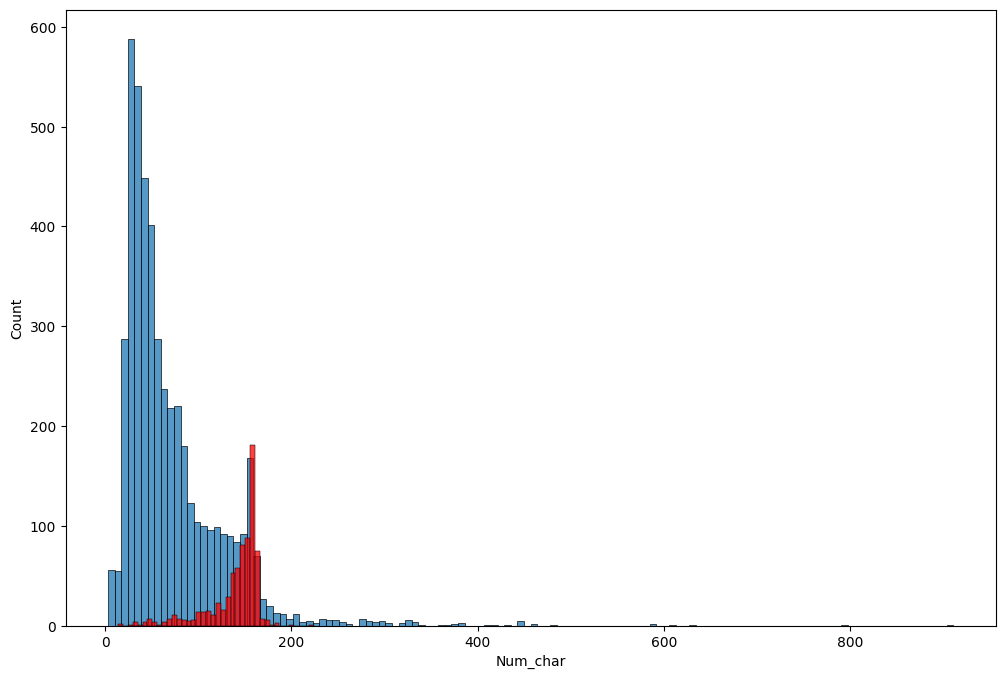

In [18]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label']==0]['Num_char'])
sns.histplot(df[df['label']==1]['Num_char'] , color='red')

<Axes: xlabel='Num_word', ylabel='Count'>

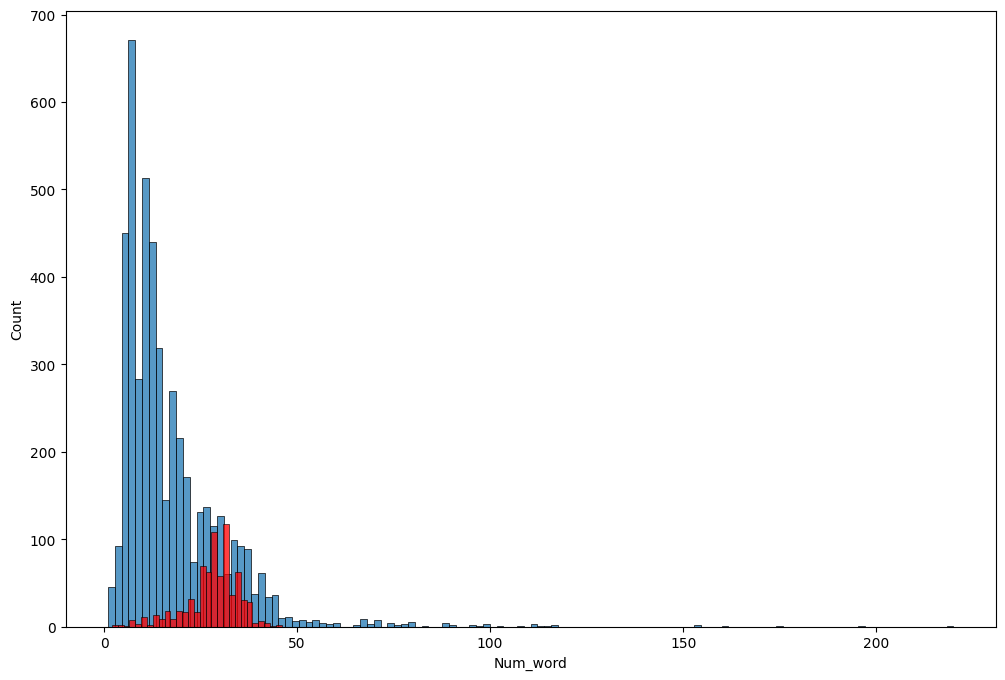

In [19]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label']==0]['Num_word'])
sns.histplot(df[df['label']==1]['Num_word'] , color='red')

<Axes: xlabel='Num_sent', ylabel='Count'>

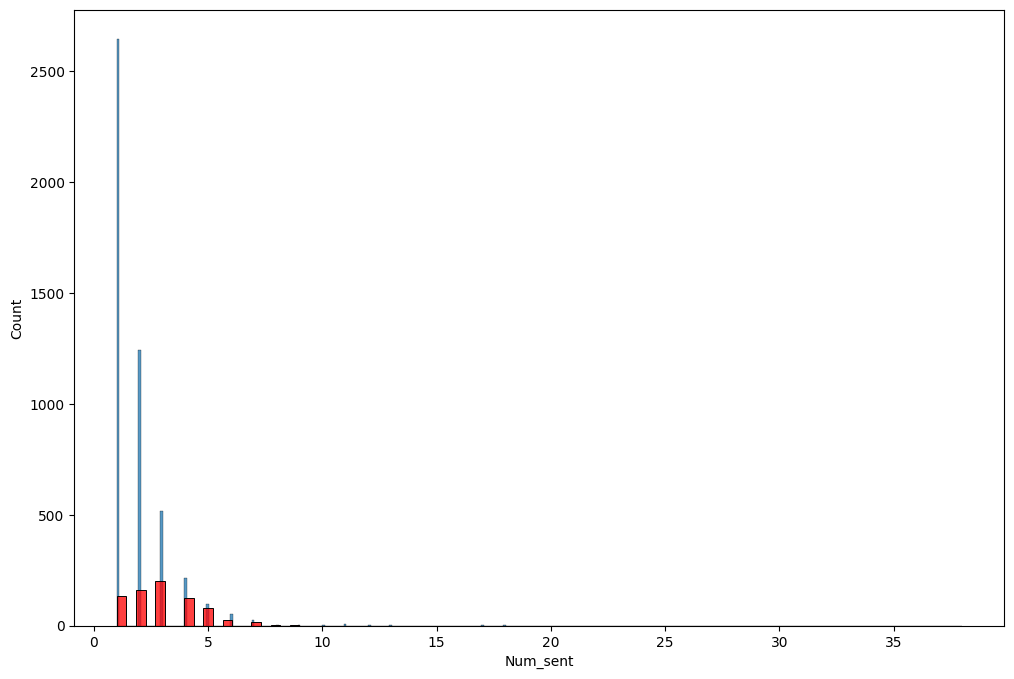

In [20]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label']==0]['Num_sent'])
sns.histplot(df[df['label']==1]['Num_sent'] , color='red')

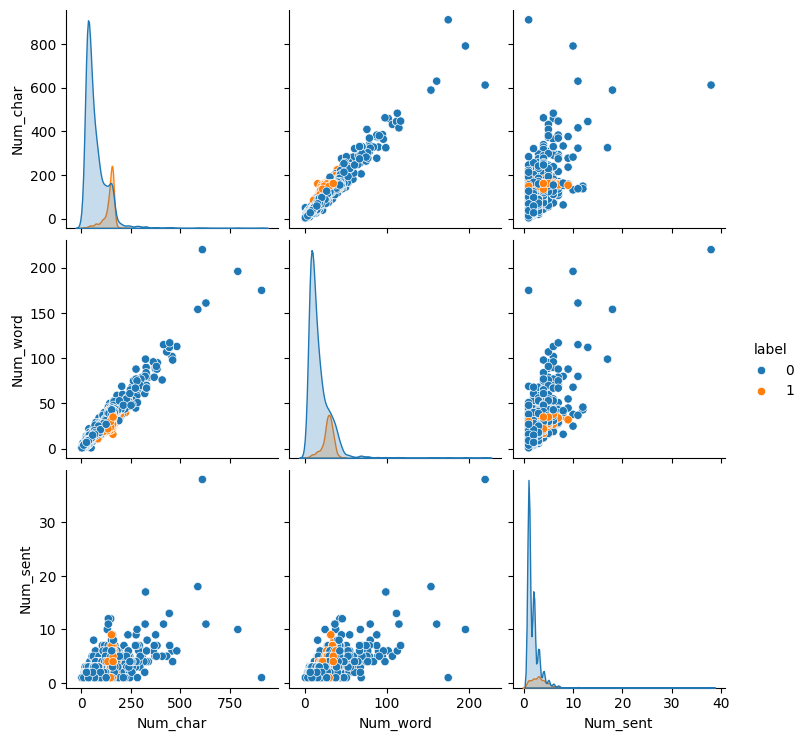

In [21]:
sns.pairplot(df , hue=('label'))

In [22]:
df.head()

,sms,label,Num_char,Num_word,Num_sent
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2
1,Ok lar... Joking wif u oni...\n,0,30,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2
3,U dun say so early hor... U c already then say...,0,50,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1


<Axes: >

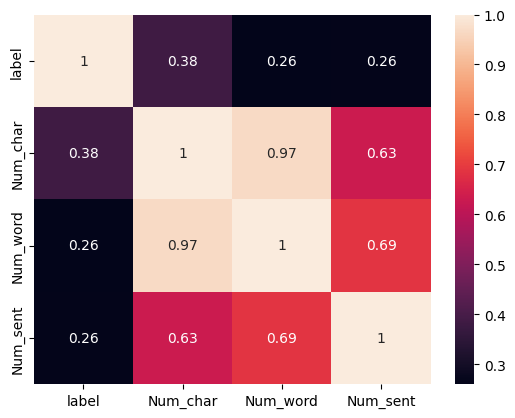

In [23]:
sns.heatmap(df.corr(numeric_only=True) , annot=True)

# Data preprocessing

In [24]:
#lower case 
#tokonized
#remove stop word
#removing special char#
#stemming


In [25]:
from nltk.corpus import stopwords


In [26]:
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [27]:
def text_tokanize(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    
    y =[]
    for i in text:
        if i.isalnum():
          y.append(i)
    text = y[ : ]
    y.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)
    text = y[ : ]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [28]:
text_tokanize(' Hi how are && you // how  Are you Amrit ')

'hi amrit'

In [29]:
df['Transform_text'] = df['sms'].apply(text_tokanize)

In [30]:
df.head()

,sms,label,Num_char,Num_word,Num_sent,Transform_text
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goe usf live around though


In [31]:
from wordcloud import WordCloud
wc = WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white' )

In [32]:
spam_wc = wc.generate(df[df['label']==1]['Transform_text'].str.cat(sep= " "))

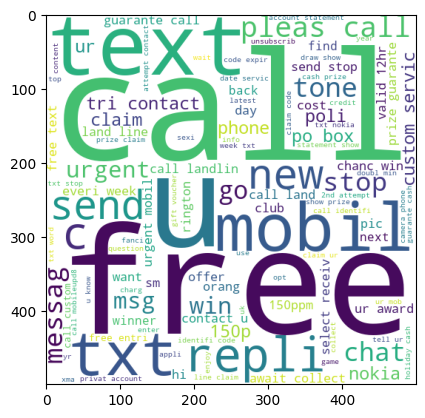

In [33]:
plt.imshow(spam_wc)

In [34]:
ham_wc = wc.generate(df[df['label']==0]['Transform_text'].str.cat(sep= " ")) 

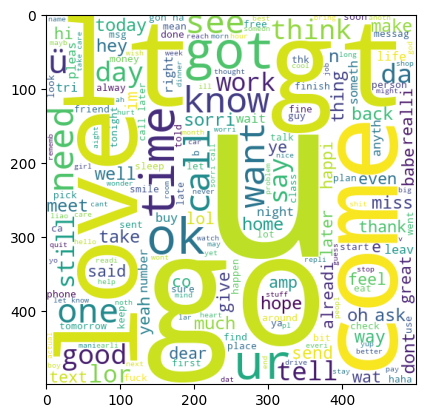

In [35]:
plt.imshow(ham_wc)

In [36]:
df.head()

,sms,label,Num_char,Num_word,Num_sent,Transform_text
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goe usf live around though


In [37]:
spam_aa= []
for msg in df[df['label']== 1]['Transform_text'].tolist():
    for word in msg.split():
        spam_aa.append(word)
    

In [38]:
len(spam_aa)

11544

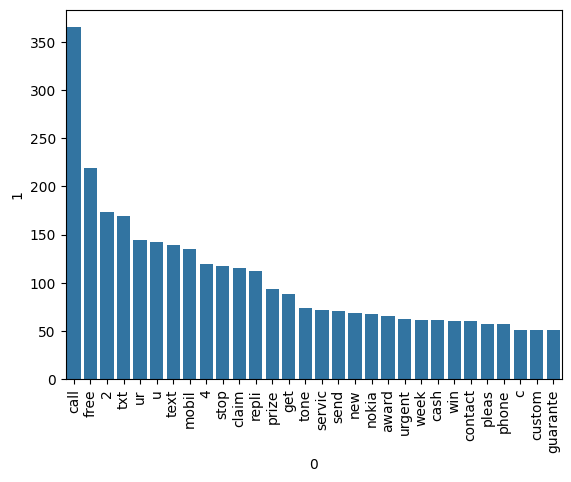

In [39]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_aa).most_common(30))[0], y=pd.DataFrame(Counter(spam_aa).most_common(30))[1]  )
plt.xticks(rotation = 'vertical')
plt.show()

In [40]:
ham_aa= []
for msg in df[df['label']== 0]['Transform_text'].tolist():
    for word in msg.split():
        ham_aa.append(word)
    

In [41]:
len(ham_aa)

38816

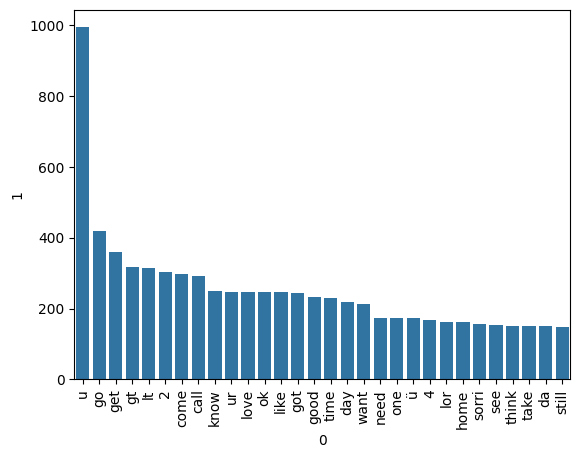

In [42]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_aa).most_common(30))[0], y=pd.DataFrame(Counter(ham_aa).most_common(30))[1]  )
plt.xticks(rotation = 'vertical')
plt.show()

#Model building

In [43]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv= CountVectorizer()
tfid = TfidfVectorizer()

In [44]:
x = tfid.fit_transform(df['Transform_text']).toarray()

In [45]:
x.shape

(5574, 6782)

In [46]:
y=df['label'].values

In [47]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test =train_test_split(x , y , random_state= 2 , test_size = 0.2 )

In [48]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [49]:
gnb.fit(X_train , y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))
print(precision_score(y_test , y_pred))

0.8511210762331839
[[814 137]
 [ 29 135]]
0.4963235294117647


In [50]:
mnb.fit(X_train , y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))
print(precision_score(y_test , y_pred))

0.9650224215246637
[[951   0]
 [ 39 125]]
1.0


In [51]:
bnb.fit(X_train , y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))
print(precision_score(y_test , y_pred))

0.9739910313901345
[[950   1]
 [ 28 136]]
0.9927007299270073


In [53]:
import pickle
pickle.dump(tfid , open('vectorize.pkl' , 'wb'))

pickle.dump(mnb , open('model.pkl' , 'wb'))